In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [2]:
df = pd.read_csv('ABCD.csv')


In [3]:
X = df[['Latitude', 'Longitude']]


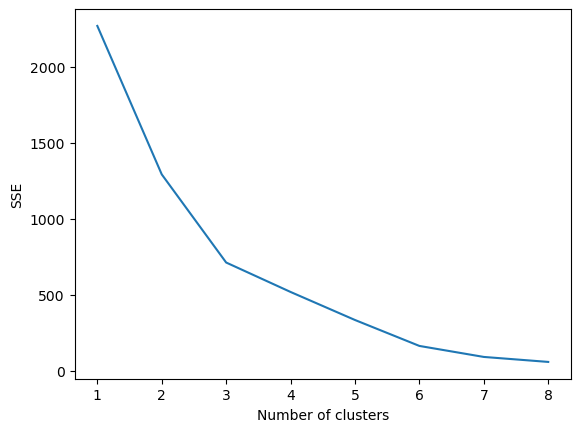

In [4]:
sse = {}
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


In [5]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)


KMeans(n_clusters=6)

In [6]:
df['cluster'] = kmeans.labels_


In [7]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,cluster
0,5/1/2011,18,2,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,0
1,5/1/2011,20,2,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,0
2,5/1/2011,40,2,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,0
3,5/1/2011,24,2,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,0
4,5/1/2011,20,2,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,0
...,...,...,...,...,...,...,...,...,...,...
75050,8/31/2011,31,2,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,2
75051,8/31/2011,35,1,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,0
75052,8/31/2011,35,1,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,0
75053,8/31/2011,46,1,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,0


In [8]:
cluster_data = df.groupby('cluster').size().reset_index(name='num_patients_in_cluster')
cluster_data


,cluster,num_patients_in_cluster
0,0,69102
1,1,1049
2,2,1405
3,3,195
4,4,3198
5,5,106


In [9]:
df = pd.merge(df, cluster_data, on='cluster', how='left')
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,cluster,num_patients_in_cluster
0,5/1/2011,18,2,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,0,69102
1,5/1/2011,20,2,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,0,69102
2,5/1/2011,40,2,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,0,69102
3,5/1/2011,24,2,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,0,69102
4,5/1/2011,20,2,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,0,69102
...,...,...,...,...,...,...,...,...,...,...,...
75050,8/31/2011,31,2,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,2,1405
75051,8/31/2011,35,1,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,0,69102
75052,8/31/2011,35,1,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,0,69102
75053,8/31/2011,46,1,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,0,69102


In [10]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Latitude', 'Longitude'])
centers['cluster'] = range(0, len(centers))


In [11]:
centers

,Latitude,Longitude,cluster
0,31.579145,74.315734,0
1,32.269661,74.727121,1
2,32.166351,74.195900,2
3,30.813802,73.453378,3
4,31.707961,73.976160,4
5,32.073979,72.686070,5


In [12]:
df = pd.merge(df, centers, on='cluster', how='left')
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude_x,Longitude_x,cluster,num_patients_in_cluster,Latitude_y,Longitude_y
0,5/1/2011,18,2,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,0,69102,31.579145,74.315734
1,5/1/2011,20,2,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,0,69102,31.579145,74.315734
2,5/1/2011,40,2,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,0,69102,31.579145,74.315734
3,5/1/2011,24,2,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,0,69102,31.579145,74.315734
4,5/1/2011,20,2,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,0,69102,31.579145,74.315734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75050,8/31/2011,31,2,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,2,1405,32.166351,74.195900
75051,8/31/2011,35,1,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,0,69102,31.579145,74.315734
75052,8/31/2011,35,1,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,0,69102,31.579145,74.315734
75053,8/31/2011,46,1,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,0,69102,31.579145,74.315734


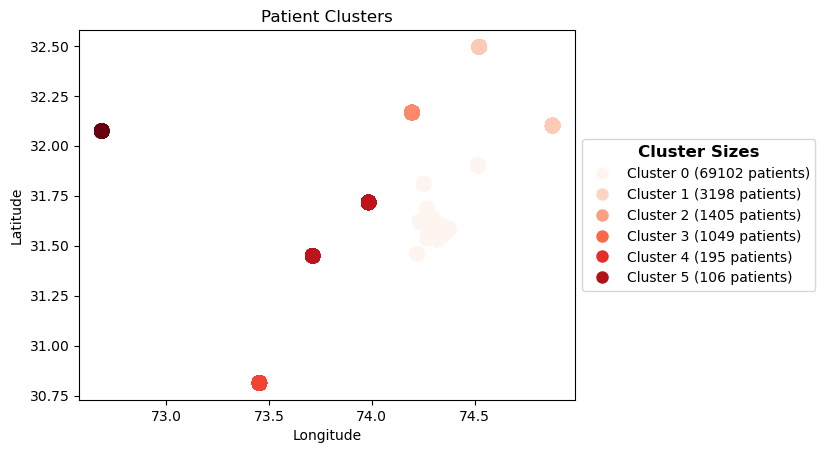

In [13]:
# Calculate cluster sizes and create label dictionary
cluster_counts = df['cluster'].value_counts()
label_dict = {i: f'Cluster {i} ({count} patients)' for i, count in enumerate(cluster_counts)}

# Plot clusters by cmap
plt.scatter(x=df['Longitude_x'], y=df['Latitude_x'], c=df['cluster'], s=100, cmap='Reds', alpha=0.5)

# Set title and axis labels
plt.title('Patient Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
legend_handles = [plt.Line2D([], [], marker='o', color='w', label=label_dict[i], markerfacecolor=plt.cm.Reds(i/6.), markersize=10) for i in range(6)]
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster Sizes')

# Set legend title font size and weight
plt.setp(plt.gca().get_legend().get_title(), fontsize=12, fontweight='bold')

# Show the plot
plt.show()